In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [55]:
df=pd.read_csv("asrs.csv",encoding='latin1')

In [56]:
df.head()

,Unnamed: 0,.ACN,Time.Date,Time.Local Time Of Day,Place.Locale Reference,Place.State Reference,Place.Relative Position.Angle.Radial,Place.Relative Position.Distance.Nautical Miles,Place.Altitude.AGL.Single Value,Place.Altitude.MSL.Single Value,...,Events.When Detected,Events.Result,Assessments.Contributing Factors / Situations,Assessments.Primary Problem,Report 1.Narrative,Report 1.Callback,Report 2.Narrative,Report 2.Callback,Report 1.Synopsis,Unnamed: 96_level_0.Unnamed: 96_level_1
0,0,925545,201101,0001-0600,ZNY.ARTCC,NY,NaN,NaN,NaN,19000.0,...,NaN,2,Human Factors; Aircraft; Equipment / Tooling,Human Factors,[I was] working air carrier 1 at FL190. Sector...,NaN,Air carrier 1 [was] being worked by Sector 56 ...,NaN,ZNY controllers and flight crew personnel desc...,NaN
1,1,925546,201101,1801-2400,ZOB.ARTCC,OH,NaN,NaN,NaN,33000.0,...,NaN,3,Human Factors,Human Factors,I walked up to the sector to relieve a Control...,NaN,NaN,NaN,Enroute Controller described an Operational De...,NaN
2,2,925559,201101,1801-2400,ZZZ.Tower,US,NaN,NaN,NaN,6700.0,...,NaN,1,Human Factors,Human Factors,Aircraft X checked in on my frequency and I di...,NaN,NaN,NaN,Tower Controller described a missed 'emergency...,NaN
3,3,925560,201101,1201-1800,ZZZ.Tower,US,NaN,NaN,0.0,NaN,...,Taxi,1,Human Factors,Human Factors,Aircraft X; a CRJ2; landed Runway XXL and was ...,NaN,NaN,NaN,Disabled aircraft causes airport authority to ...,NaN
4,4,925563,201101,1201-1800,ZOB.ARTCC,OH,NaN,NaN,NaN,15000.0,...,In-flight,1,Human Factors; Procedure; Staffing,Human Factors,I was working combined sectors with no D-side....,NaN,NaN,NaN,ZOB Controller reported that when an aircraft ...,NaN


In [57]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0     .ACN  Time.Date Time.Local Time Of Day  \
0               0   925545     201101              0001-0600   
1               1   925546     201101              1801-2400   
2               2   925559     201101              1801-2400   
3               3   925560     201101              1201-1800   
4               4   925563     201101              1201-1800   
...           ...      ...        ...                    ...   
15290       15660  1152871     201402              1801-2400   
15291       15661  1152887     201402              0001-0600   
15292       15662  1152900     201402              1201-1800   
15293       15663  1152910     201402              0601-1200   
15294       15664  1152927     201402                    NaN   

      Place.Locale Reference Place.State Reference  \
0                  ZNY.ARTCC                    NY   
1                  ZOB.ARTCC                    OH   
2                  ZZZ.Tower       

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15295 entries, 0 to 15294
Data columns (total 98 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Unnamed: 0                                                     15295 non-null  int64  
 1    .ACN                                                          15295 non-null  int64  
 2   Time.Date                                                      15295 non-null  int64  
 3   Time.Local Time Of Day                                         14460 non-null  object 
 4   Place.Locale Reference                                         14834 non-null  object 
 5   Place.State Reference                                          14835 non-null  object 
 6   Place.Relative Position.Angle.Radial                           530 non-null    float64
 7   Place.Relative Position.Distance.Nautical Miles           

In [59]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [60]:
# Convert specific columns to numeric after cleaning if necessary
df['Aircraft 1.Number Of Seats.Number'] = pd.to_numeric(df['Aircraft 1.Number Of Seats.Number'], errors='coerce')
df['Aircraft 1.Passengers On Board.Number'] = pd.to_numeric(df['Aircraft 1.Passengers On Board.Number'], errors='coerce')
df['Aircraft 1.Crew Size Flight Attendant.Number Of Crew'] = pd.to_numeric(df['Aircraft 1.Crew Size Flight Attendant.Number Of Crew'], errors='coerce')
df['Aircraft 2.Number Of Seats.Number'] = pd.to_numeric(df['Aircraft 2.Number Of Seats.Number'], errors='coerce')
df['Aircraft 2.Passengers On Board.Number'] = pd.to_numeric(df['Aircraft 2.Passengers On Board.Number'], errors='coerce')
df['Aircraft 2.Crew Size Flight Attendant.Number Of Crew'] = pd.to_numeric(df['Aircraft 2.Crew Size Flight Attendant.Number Of Crew'], errors='coerce')

# Remove non-numeric characters and convert where applicable
df['Environment.Ceiling'] = df['Environment.Ceiling'].str.replace('ft', '').astype(float, errors='ignore')
df['Events.Miss Distance'] = pd.to_numeric(df['Events.Miss Distance'], errors='coerce')


In [61]:
categorical_cols=[i for i in df.columns if df[i].dtype=='object']
numerical_cols=[i for i in df.columns if df[i].dtype!='object']

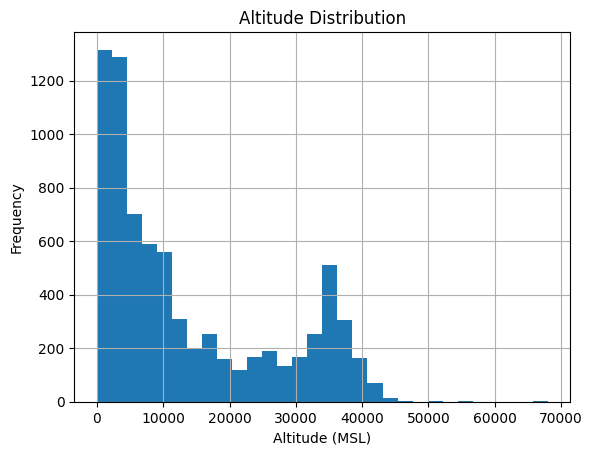

In [62]:
df['Place.Altitude.MSL.Single Value'].hist(bins=30)
plt.title('Altitude Distribution')
plt.xlabel('Altitude (MSL)')
plt.ylabel('Frequency')
plt.show()

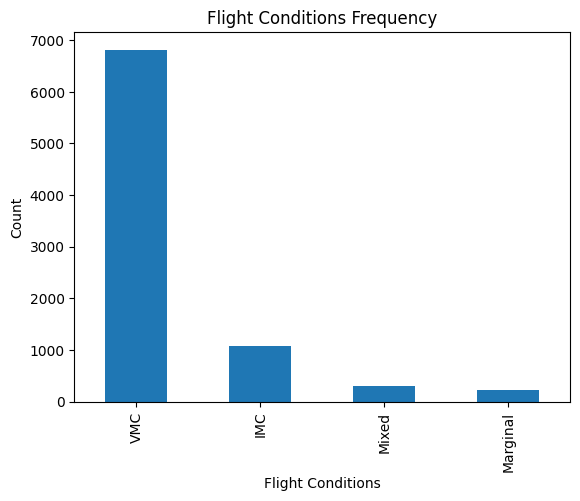

In [63]:
df['Environment.Flight Conditions'].value_counts().plot(kind='bar')
plt.title('Flight Conditions Frequency')
plt.xlabel('Flight Conditions')
plt.ylabel('Count')
plt.show()

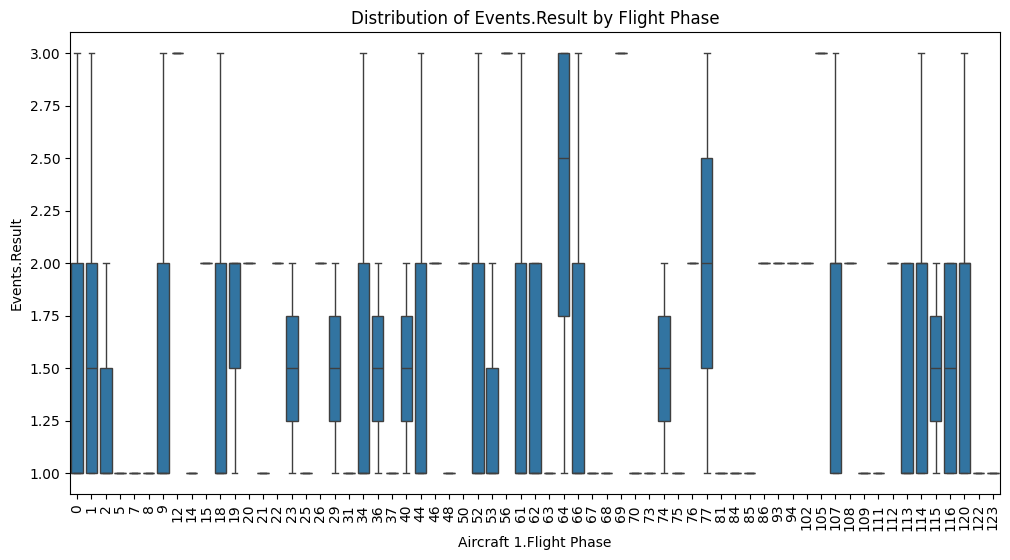

In [83]:
# Distribution of Events.Result by Flight Phase
plt.figure(figsize=(12,6))
sns.boxplot(x='Aircraft 1.Flight Phase', y='Events.Result', data=df)
plt.title('Distribution of Events.Result by Flight Phase')
plt.xticks(rotation=90)
plt.show()


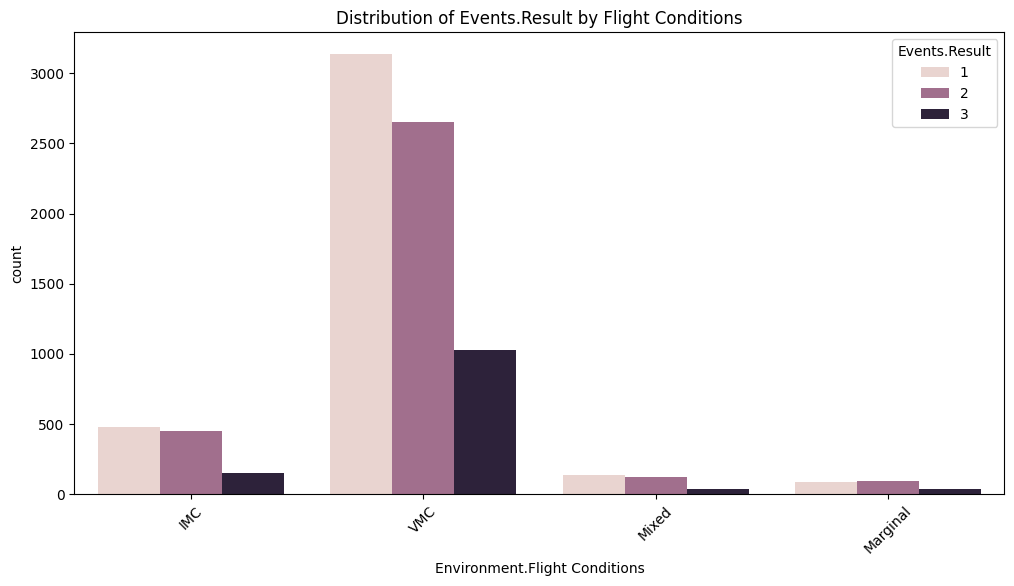

In [65]:
# Distribution of Events.Result by Flight Conditions
plt.figure(figsize=(12,6))
sns.countplot(x='Environment.Flight Conditions', hue='Events.Result', data=df)
plt.title('Distribution of Events.Result by Flight Conditions')
plt.xticks(rotation=45)
plt.show()


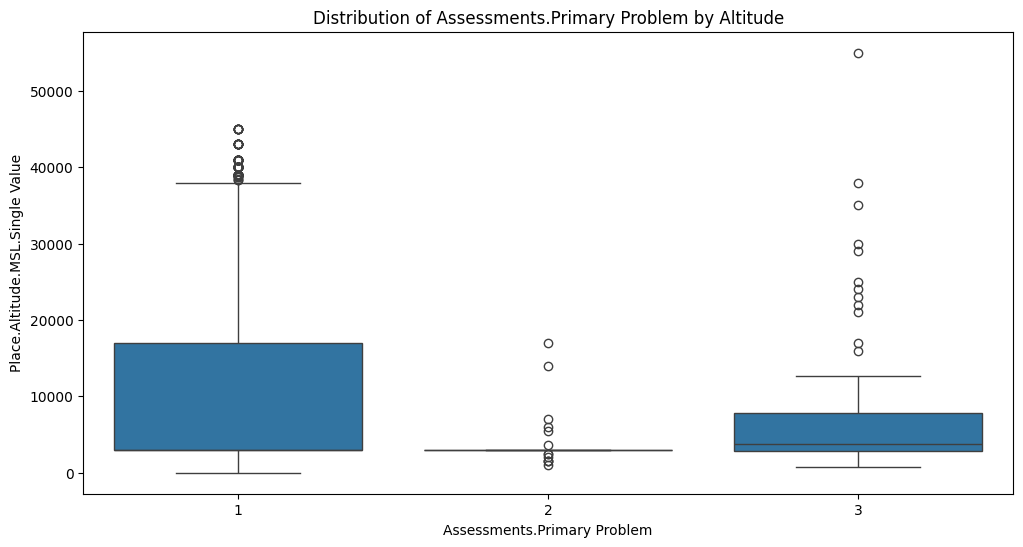

In [82]:
# Distribution of Assessments.Primary Problem by Altitude
plt.figure(figsize=(12,6))
sns.boxplot(x='Assessments.Primary Problem', y='Place.Altitude.MSL.Single Value', data=df)
plt.title('Distribution of Assessments.Primary Problem by Altitude')
plt.show()


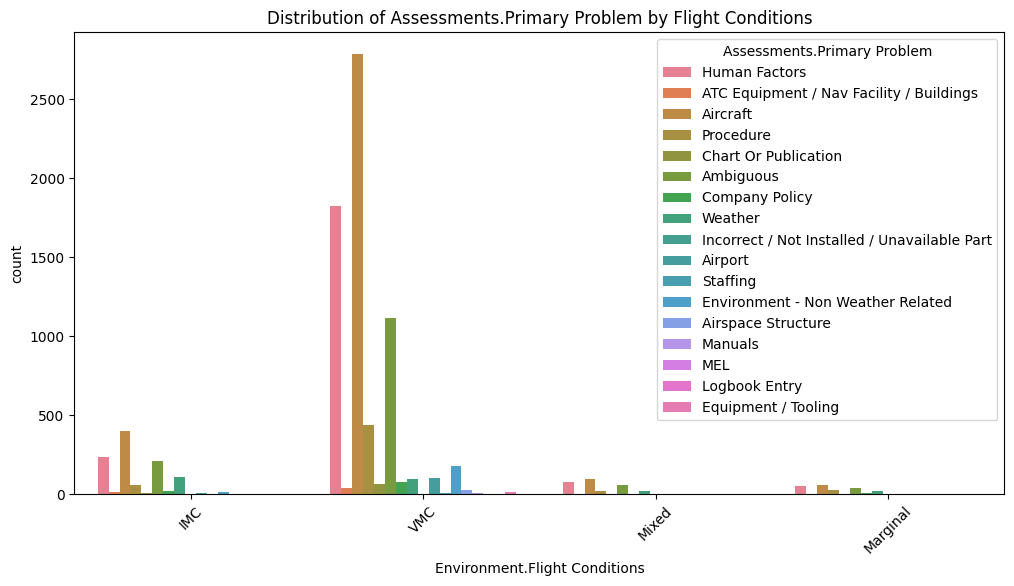

In [67]:
# Distribution of Assessments.Primary Problem by Flight Conditions
plt.figure(figsize=(12,6))
sns.countplot(x='Environment.Flight Conditions', hue='Assessments.Primary Problem', data=df)
plt.title('Distribution of Assessments.Primary Problem by Flight Conditions')
plt.xticks(rotation=45)
plt.show()


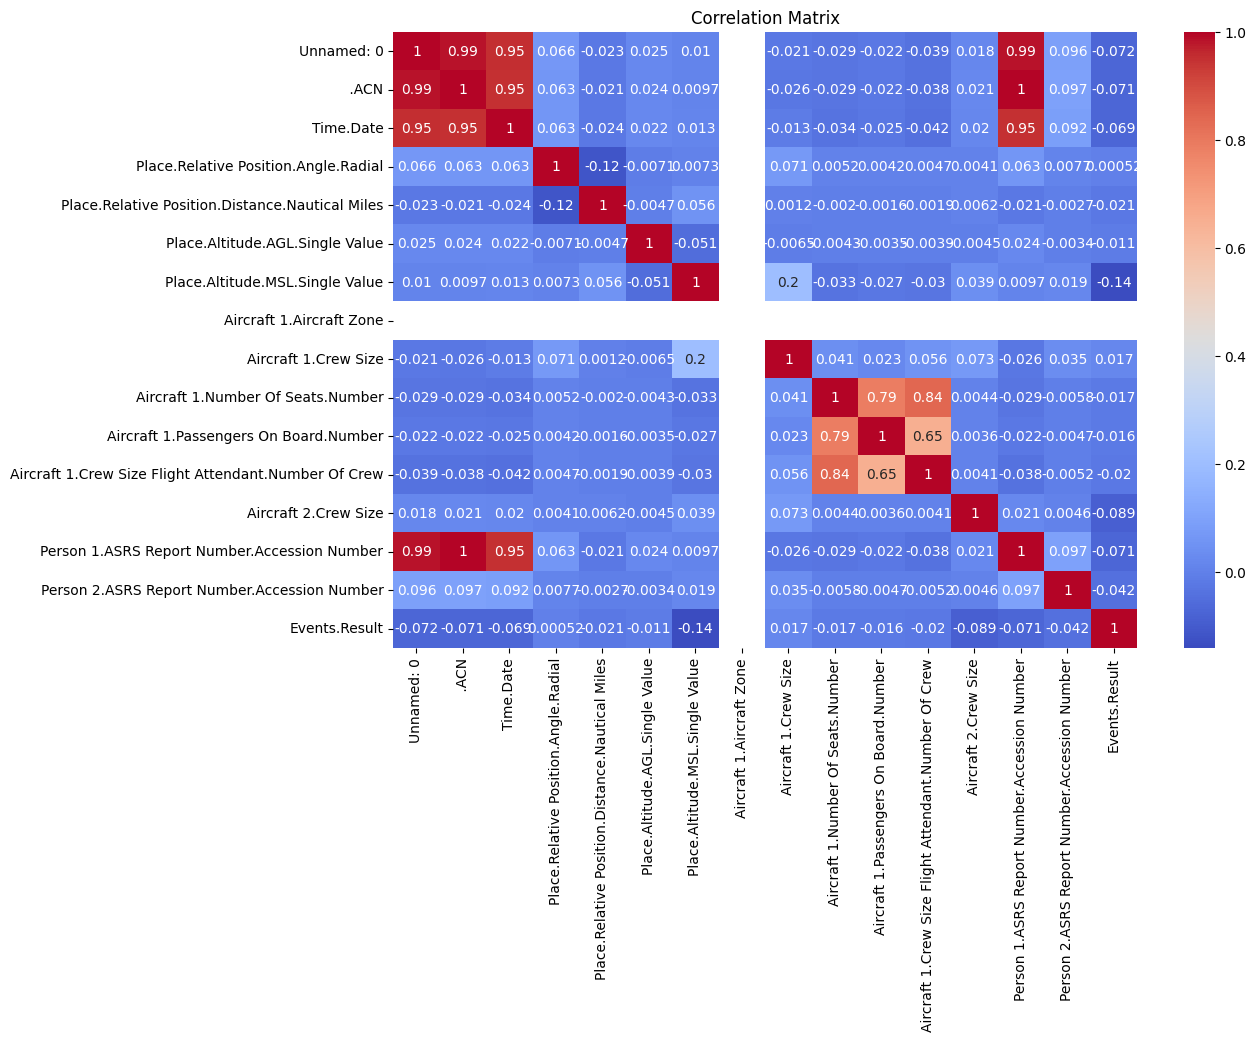

In [81]:
numeric_df=df.select_dtypes(include=['float64','int64'])
numeric_df_dropped = numeric_df.dropna(thresh=int(0.8 * len(numeric_df)), axis=1)

data = numeric_df_dropped.corr()

plt.figure(figsize=(12,8))
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


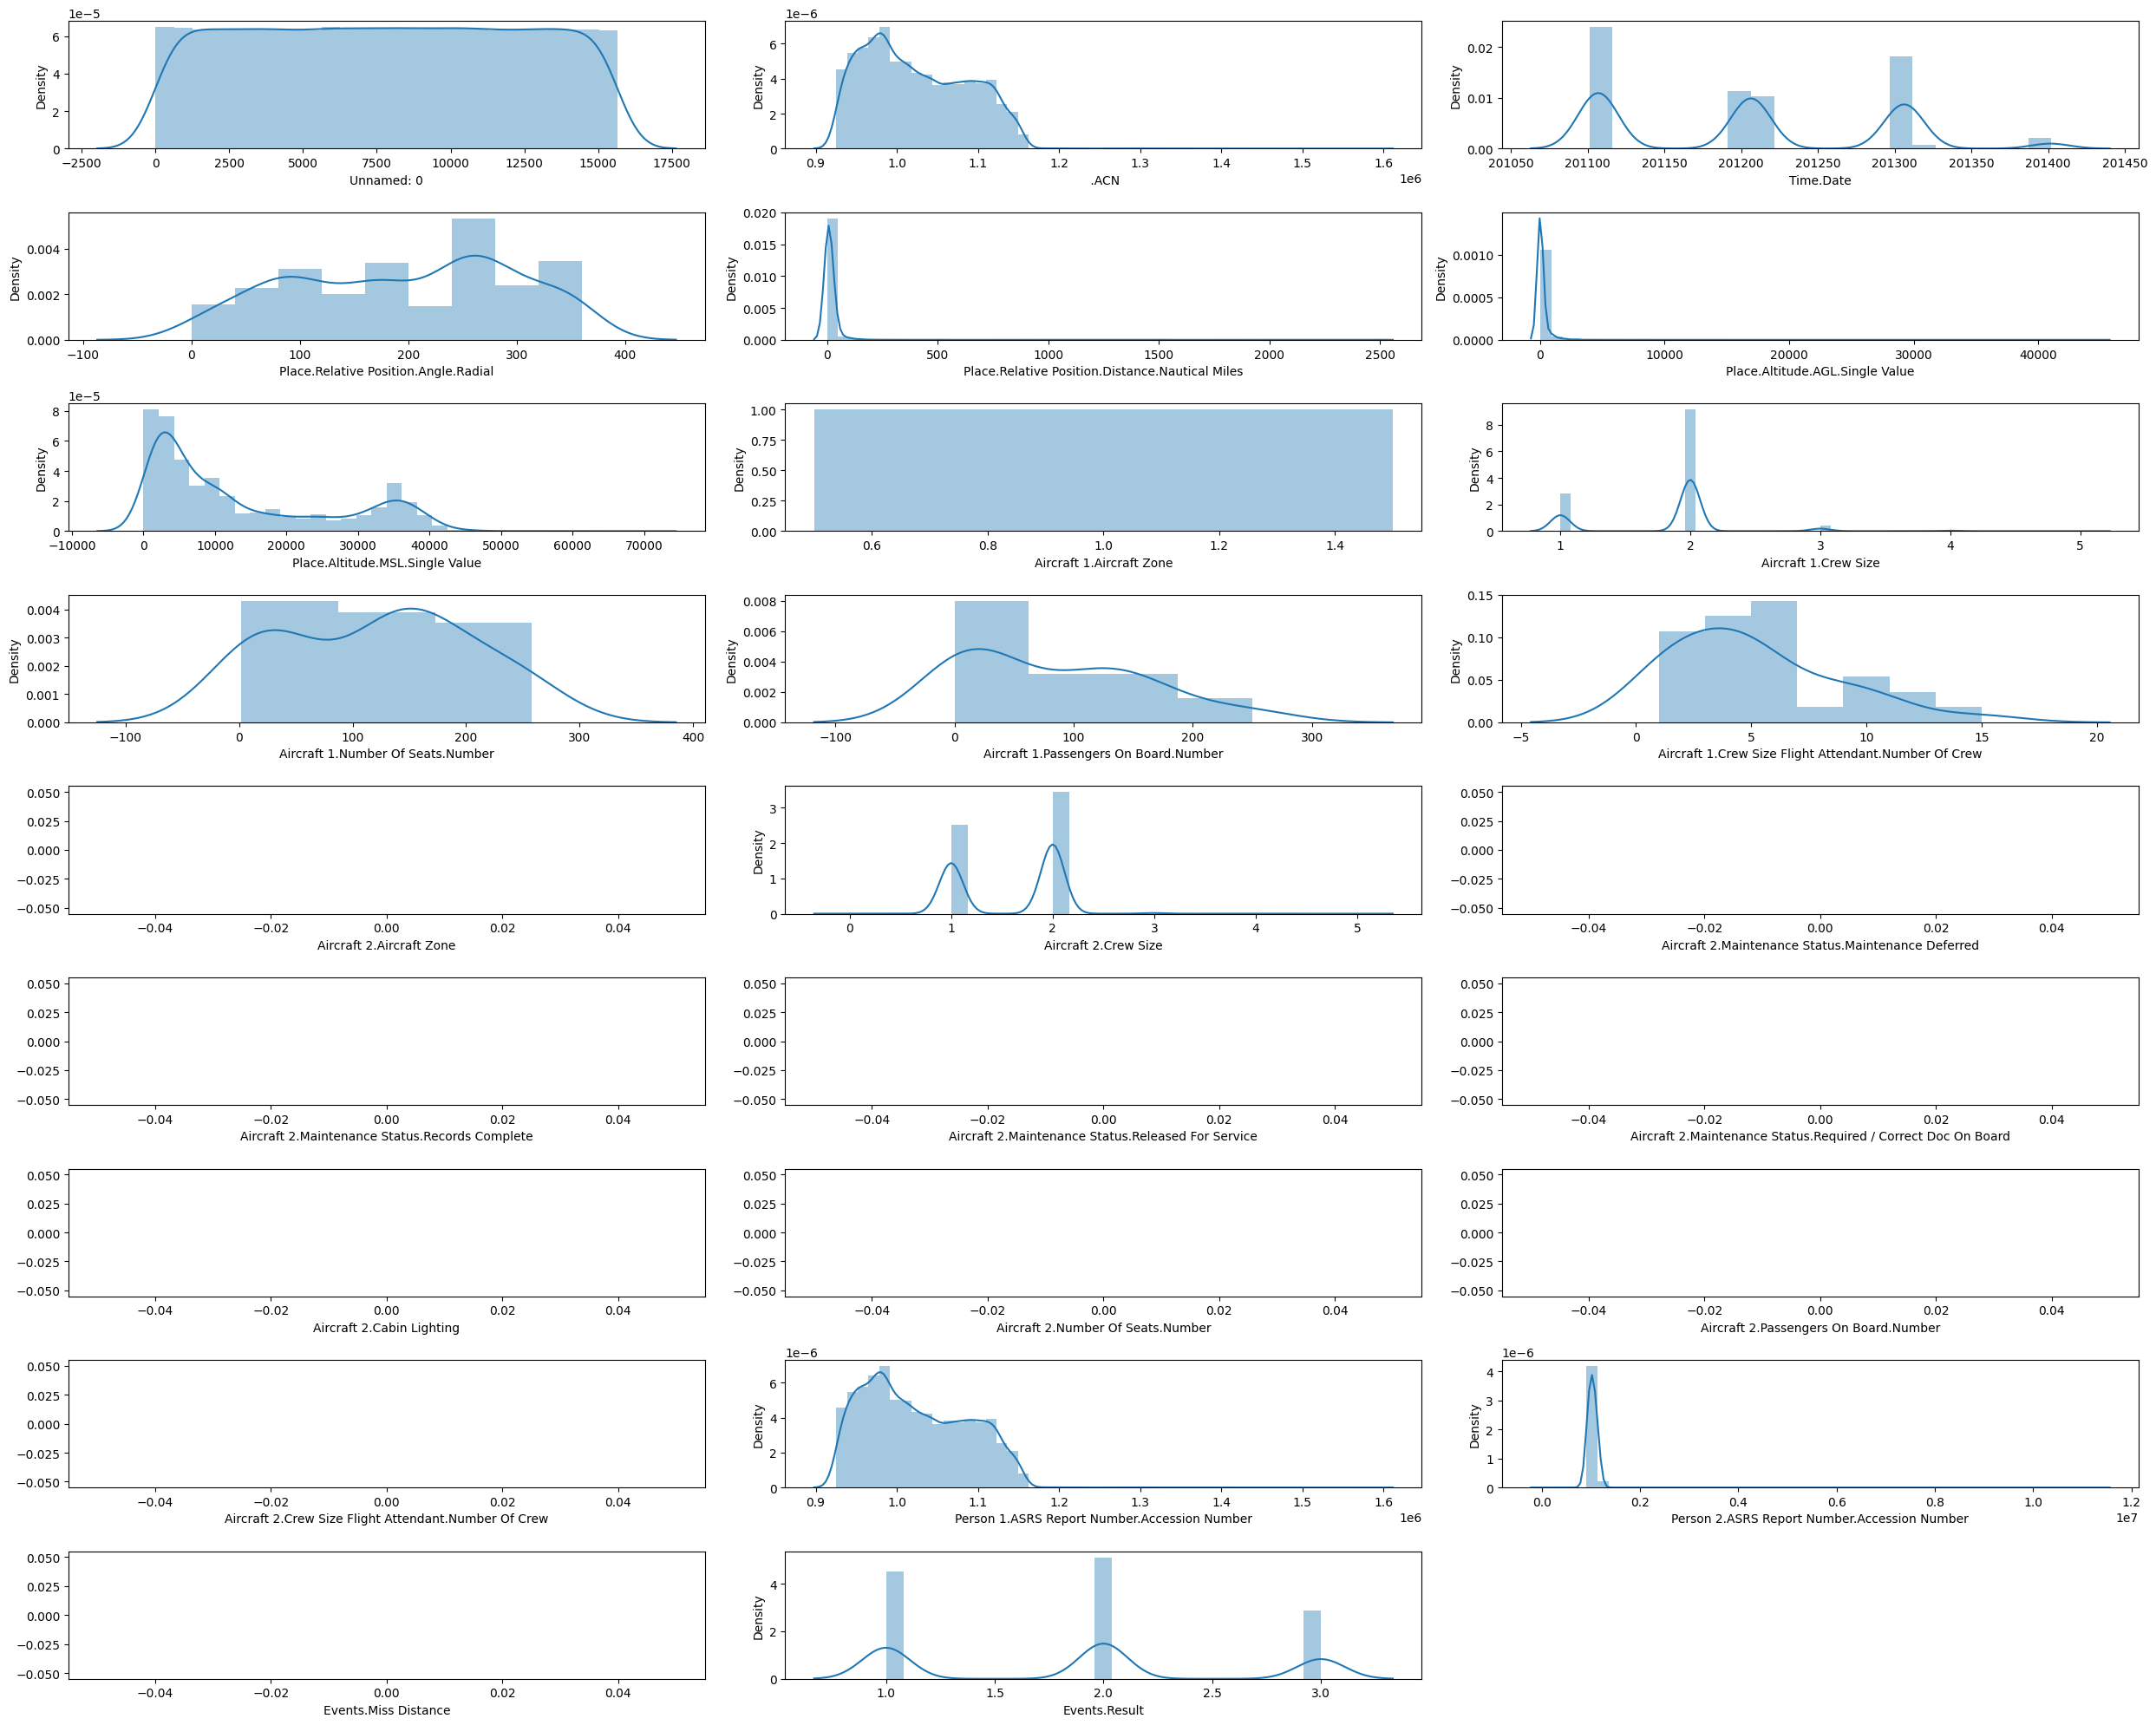

In [69]:
plt.figure(figsize=(25,20))
x=1;
for i in numerical_cols:
    if x<len(numerical_cols):
        ax=plt.subplot(9,3,x)
        sns.distplot(df[i])
        plt.xlabel(i)
    x+=1;
plt.tight_layout()
plt.show()

In [70]:
df[numerical_cols].isna().sum().sort_values(ascending=False)

Unnamed: 96_level_0.Unnamed: 96_level_1                          15295
Aircraft 2.Maintenance Status.Required / Correct Doc On Board    15295
Aircraft 2.Maintenance Status.Records Complete                   15295
Aircraft 2.Maintenance Status.Maintenance Deferred               15295
Aircraft 2.Cabin Lighting                                        15295
Aircraft 2.Aircraft Zone                                         15295
Aircraft 2.Number Of Seats.Number                                15295
Aircraft 2.Passengers On Board.Number                            15295
Aircraft 2.Crew Size Flight Attendant.Number Of Crew             15295
Events.Miss Distance                                             15295
Aircraft 2.Maintenance Status.Released For Service               15295
Aircraft 1.Aircraft Zone                                         15294
Aircraft 1.Crew Size Flight Attendant.Number Of Crew             15267
Aircraft 1.Number Of Seats.Number                                15265
Aircra

In [71]:
df[categorical_cols].isna().sum().sort_values(ascending=False)

Aircraft 2.Maintenance Status.Maintenance Items Involved    15293
Aircraft 2.Maintenance Status.Maintenance Type              15293
Person 2.Cabin Activity                                     15266
Aircraft 1.Cabin Lighting                                   15245
Aircraft 2.Nav In Use                                       15235
                                                            ...  
Assessments.Primary Problem                                    34
Aircraft 1.Make Model Name                                     29
Events.Anomaly                                                  3
Report 1.Synopsis                                               1
Report 1.Narrative                                              0
Length: 71, dtype: int64

In [72]:
def fill_nulls_with_mode_in_categorical(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for column in categorical_cols:
        mode_series = df[column].mode(dropna=True)
        
        if not mode_series.empty:
            mode_value = mode_series[0]  
            df[column].fillna(mode_value, inplace=True)
        else:
            print(f"Column '{column}' has only NaN values; cannot calculate mode.")
    
    null_counts = df[categorical_cols].isna().sum()
    print("Null values in categorical columns after filling:")
    print(null_counts)
    
    return df


In [73]:
df=fill_nulls_with_mode_in_categorical(df)

Null values in categorical columns after filling:
Time.Local Time Of Day                       0
Place.Locale Reference                       0
Place.State Reference                        0
Environment.Flight Conditions                0
Environment.Weather Elements / Visibility    0
                                            ..
Report 1.Narrative                           0
Report 1.Callback                            0
Report 2.Narrative                           0
Report 2.Callback                            0
Report 1.Synopsis                            0
Length: 71, dtype: int64


In [74]:
def fill_nulls_with_mode_in_numerical(df):
    categorical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    for column in numerical_cols:
        mode_series = df[column].mode(dropna=True)
        
        if not mode_series.empty:
            mode_value = mode_series[0]  
            df[column].fillna(mode_value, inplace=True)
        else:
            print(f"Column '{column}' has only NaN values; cannot calculate mode.")
    
    null_counts = df[numerical_cols].isna().sum()
    print("Null values in numerical columns after filling:")
    print(null_counts)
    
    return df


In [75]:
df=fill_nulls_with_mode_in_numerical(df)

Column 'Aircraft 2.Aircraft Zone' has only NaN values; cannot calculate mode.
Column 'Aircraft 2.Maintenance Status.Maintenance Deferred' has only NaN values; cannot calculate mode.
Column 'Aircraft 2.Maintenance Status.Records Complete' has only NaN values; cannot calculate mode.
Column 'Aircraft 2.Maintenance Status.Released For Service' has only NaN values; cannot calculate mode.
Column 'Aircraft 2.Maintenance Status.Required / Correct Doc On Board' has only NaN values; cannot calculate mode.
Column 'Aircraft 2.Cabin Lighting' has only NaN values; cannot calculate mode.
Column 'Aircraft 2.Number Of Seats.Number' has only NaN values; cannot calculate mode.
Column 'Aircraft 2.Passengers On Board.Number' has only NaN values; cannot calculate mode.
Column 'Aircraft 2.Crew Size Flight Attendant.Number Of Crew' has only NaN values; cannot calculate mode.
Column 'Events.Miss Distance' has only NaN values; cannot calculate mode.
Column 'Unnamed: 96_level_0.Unnamed: 96_level_1' has only NaN 

In [76]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()
for i in categorical_cols:
    df[i]=label_encoder.fit_transform(df[i])

In [77]:
df.head()

,Unnamed: 0,.ACN,Time.Date,Time.Local Time Of Day,Place.Locale Reference,Place.State Reference,Place.Relative Position.Angle.Radial,Place.Relative Position.Distance.Nautical Miles,Place.Altitude.AGL.Single Value,Place.Altitude.MSL.Single Value,...,Events.When Detected,Events.Result,Assessments.Contributing Factors / Situations,Assessments.Primary Problem,Report 1.Narrative,Report 1.Callback,Report 2.Narrative,Report 2.Callback,Report 1.Synopsis,Unnamed: 96_level_0.Unnamed: 96_level_1
0,0,925545,201101,0,1144,40,270.0,10.0,0.0,19000.0,...,8,2,1016,9,14887,0,238,0,15144,NaN
1,1,925546,201101,3,1146,41,270.0,10.0,0.0,33000.0,...,8,3,992,9,6118,0,2765,0,10914,NaN
2,2,925559,201101,3,1160,53,270.0,10.0,0.0,6700.0,...,8,1,992,9,1605,0,2765,0,13895,NaN
3,3,925560,201101,2,1160,53,270.0,10.0,0.0,3000.0,...,189,1,992,9,1708,0,2765,0,10323,NaN
4,4,925563,201101,2,1146,41,270.0,10.0,0.0,15000.0,...,8,1,1223,9,7589,0,2765,0,15190,NaN


Metrics for Events.Result Model:
Accuracy: 0.64, F1-Score: 0.61, Recall: 0.64

Metrics for Assessments.Primary Problem Model:
Accuracy: 0.99, F1-Score: 0.99, Recall: 0.99


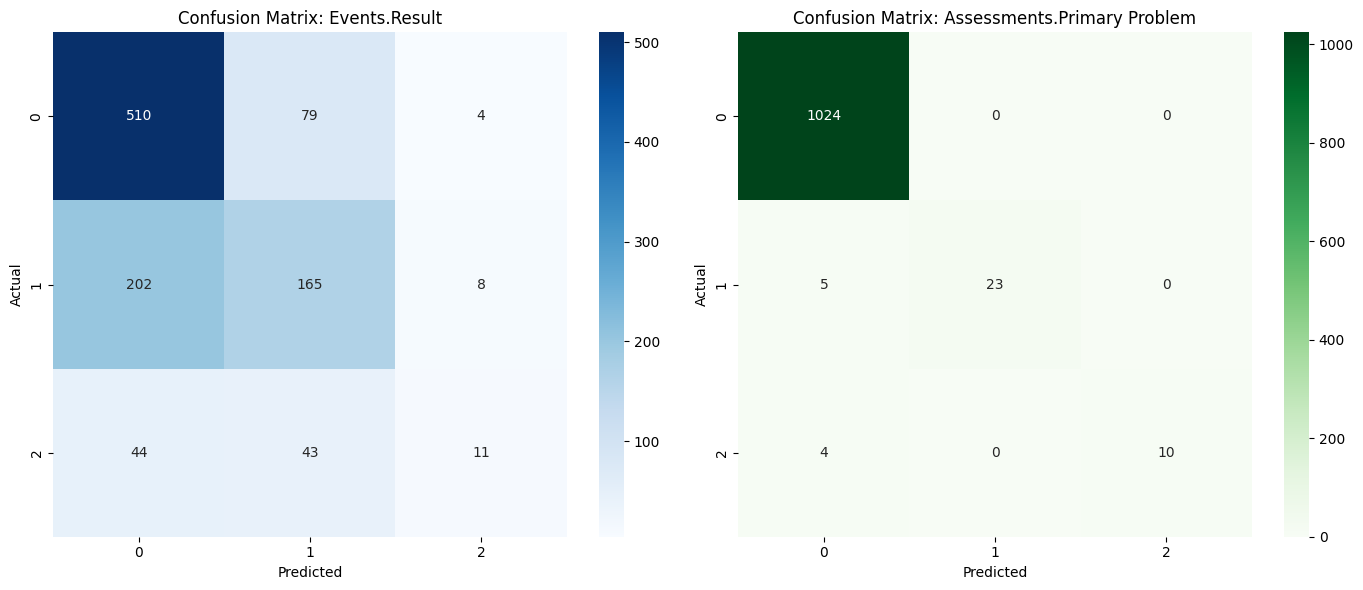

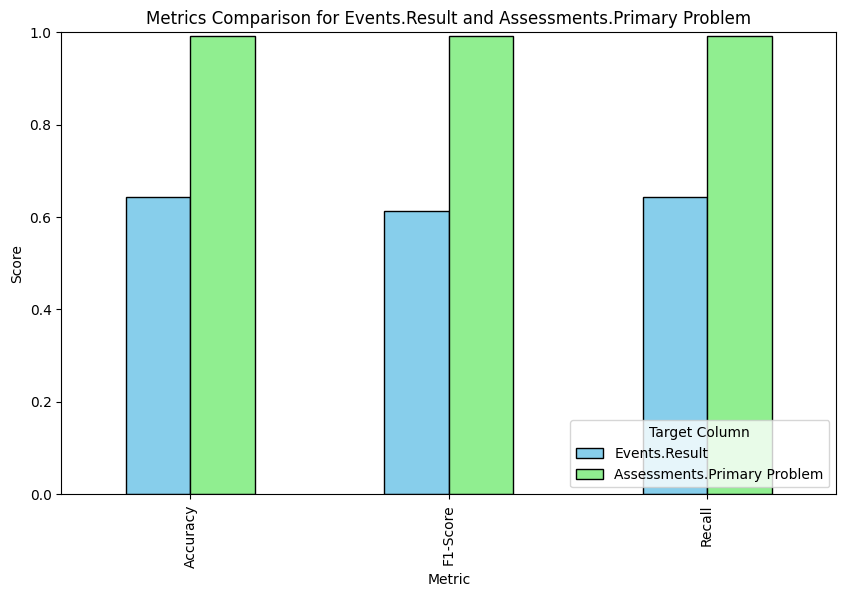

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score

df = df[df['Events.Result'].isin([1, 2, 3])]
df = df[df['Assessments.Primary Problem'].isin([1, 2, 3])]

y_result = df['Events.Result'].map({1: 0, 2: 1, 3: 2})
y_problem = df['Assessments.Primary Problem'].map({1: 0, 2: 1, 3: 2})
X = df.drop(columns=['Events.Result', 'Assessments.Primary Problem'])

X_train_result, X_test_result, y_train_result, y_test_result = train_test_split(
    X, y_result, test_size=0.2, random_state=42
)
X_train_problem, X_test_problem, y_train_problem, y_test_problem = train_test_split(
    X, y_problem, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42, n_estimators=100)

# Evaluate for Events.Result
model.fit(X_train_result, y_train_result)
y_pred_result = model.predict(X_test_result)

accuracy_result = accuracy_score(y_test_result, y_pred_result)
f1_result = f1_score(y_test_result, y_pred_result, average='weighted')
recall_result = recall_score(y_test_result, y_pred_result, average='weighted')
conf_matrix_result = confusion_matrix(y_test_result, y_pred_result)

# Evaluate for Assessments.Primary Problem
model.fit(X_train_problem, y_train_problem)
y_pred_problem = model.predict(X_test_problem)

accuracy_problem = accuracy_score(y_test_problem, y_pred_problem)
f1_problem = f1_score(y_test_problem, y_pred_problem, average='weighted')
recall_problem = recall_score(y_test_problem, y_pred_problem, average='weighted')
conf_matrix_problem = confusion_matrix(y_test_problem, y_pred_problem)

# Print metrics
print("Metrics for Events.Result Model:")
print(f"Accuracy: {accuracy_result:.2f}, F1-Score: {f1_result:.2f}, Recall: {recall_result:.2f}")

print("\nMetrics for Assessments.Primary Problem Model:")
print(f"Accuracy: {accuracy_problem:.2f}, F1-Score: {f1_problem:.2f}, Recall: {recall_problem:.2f}")

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_result, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix: Events.Result")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_problem, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix: Assessments.Primary Problem")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Compare metrics using a bar chart
metrics = {
    "Metric": ["Accuracy", "F1-Score", "Recall"],
    "Events.Result": [accuracy_result, f1_result, recall_result],
    "Assessments.Primary Problem": [accuracy_problem, f1_problem, recall_problem],
}

metrics_df = pd.DataFrame(metrics)

metrics_df.plot(
    x="Metric",
    kind="bar",
    figsize=(10, 6),
    color=["skyblue", "lightgreen"],
    edgecolor="black",
)
plt.title("Metrics Comparison for Events.Result and Assessments.Primary Problem")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Target Column", loc="lower right")
plt.show()


Metrics for Events.Result Model:
Accuracy: 0.66, F1-Score: 0.65, Recall: 0.66

Metrics for Assessments.Primary Problem Model:
Accuracy: 0.99, F1-Score: 0.99, Recall: 0.99


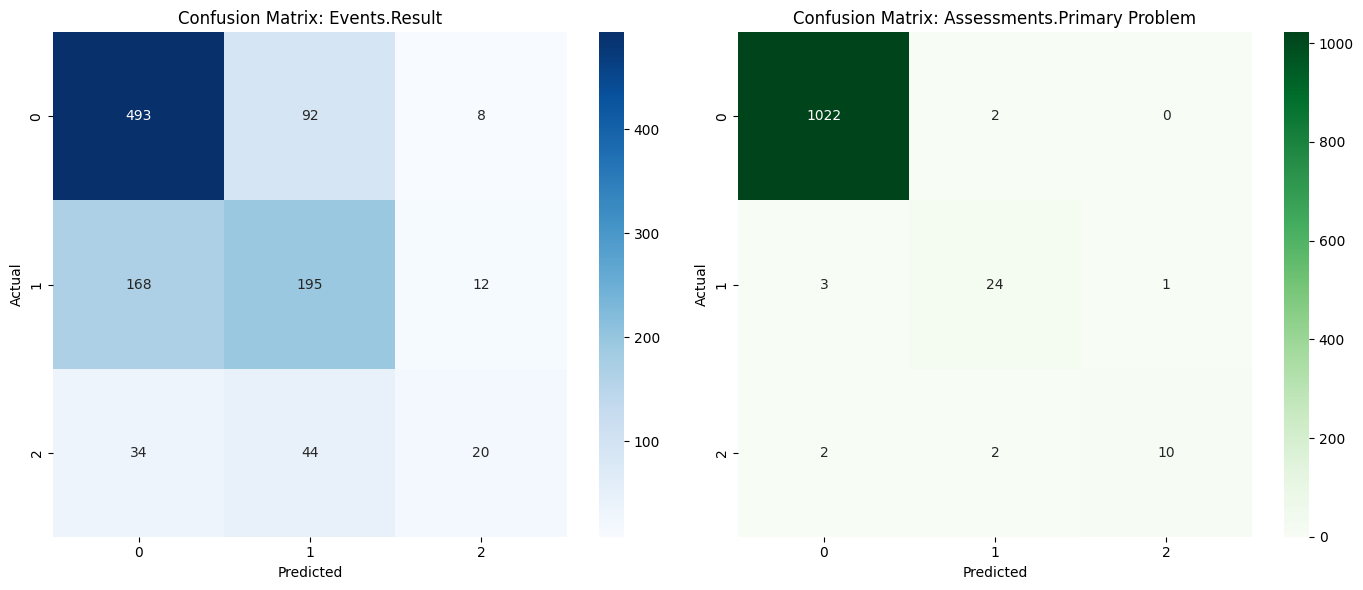

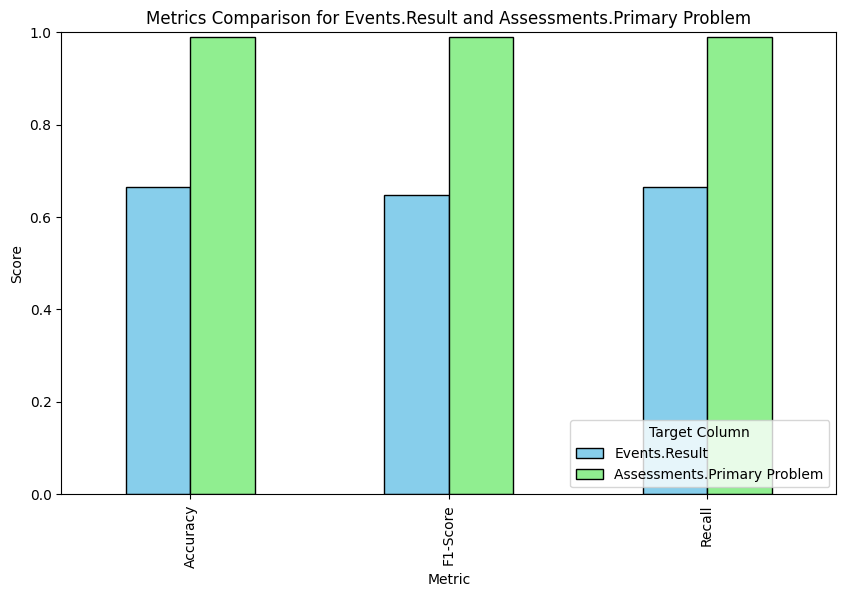

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

df = df[df['Events.Result'].isin([1, 2, 3])]
df = df[df['Assessments.Primary Problem'].isin([1, 2, 3])]

y_result = df['Events.Result'].map({1: 0, 2: 1, 3: 2})
y_problem = df['Assessments.Primary Problem'].map({1: 0, 2: 1, 3: 2})
X = df.drop(columns=['Events.Result', 'Assessments.Primary Problem'])

X_train_result, X_test_result, y_train_result, y_test_result = train_test_split(
    X, y_result, test_size=0.2, random_state=42
)
X_train_problem, X_test_problem, y_train_problem, y_test_problem = train_test_split(
    X, y_problem, test_size=0.2, random_state=42
)

model = HistGradientBoostingClassifier(random_state=42)

# Evaluate for Events.Result
model.fit(X_train_result, y_train_result)
y_pred_result = model.predict(X_test_result)

accuracy_result = accuracy_score(y_test_result, y_pred_result)
f1_result = f1_score(y_test_result, y_pred_result, average='weighted')
recall_result = recall_score(y_test_result, y_pred_result, average='weighted')
conf_matrix_result = confusion_matrix(y_test_result, y_pred_result)

# Evaluate for Assessments.Primary Problem
model.fit(X_train_problem, y_train_problem)
y_pred_problem = model.predict(X_test_problem)

accuracy_problem = accuracy_score(y_test_problem, y_pred_problem)
f1_problem = f1_score(y_test_problem, y_pred_problem, average='weighted')
recall_problem = recall_score(y_test_problem, y_pred_problem, average='weighted')
conf_matrix_problem = confusion_matrix(y_test_problem, y_pred_problem)

# Print metrics
print("Metrics for Events.Result Model:")
print(f"Accuracy: {accuracy_result:.2f}, F1-Score: {f1_result:.2f}, Recall: {recall_result:.2f}")

print("\nMetrics for Assessments.Primary Problem Model:")
print(f"Accuracy: {accuracy_problem:.2f}, F1-Score: {f1_problem:.2f}, Recall: {recall_problem:.2f}")

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_result, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix: Events.Result")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_problem, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix: Assessments.Primary Problem")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Compare metrics using a bar chart
metrics = {
    "Metric": ["Accuracy", "F1-Score", "Recall"],
    "Events.Result": [accuracy_result, f1_result, recall_result],
    "Assessments.Primary Problem": [accuracy_problem, f1_problem, recall_problem],
}

metrics_df = pd.DataFrame(metrics)

metrics_df.plot(
    x="Metric",
    kind="bar",
    figsize=(10, 6),
    color=["skyblue", "lightgreen"],
    edgecolor="black",
)
plt.title("Metrics Comparison for Events.Result and Assessments.Primary Problem")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Target Column", loc="lower right")
plt.show()


Metrics for Events.Result Model:
Accuracy: 0.66, F1-Score: 0.64, Recall: 0.66

Metrics for Assessments.Primary Problem Model:
Accuracy: 0.99, F1-Score: 0.99, Recall: 0.99


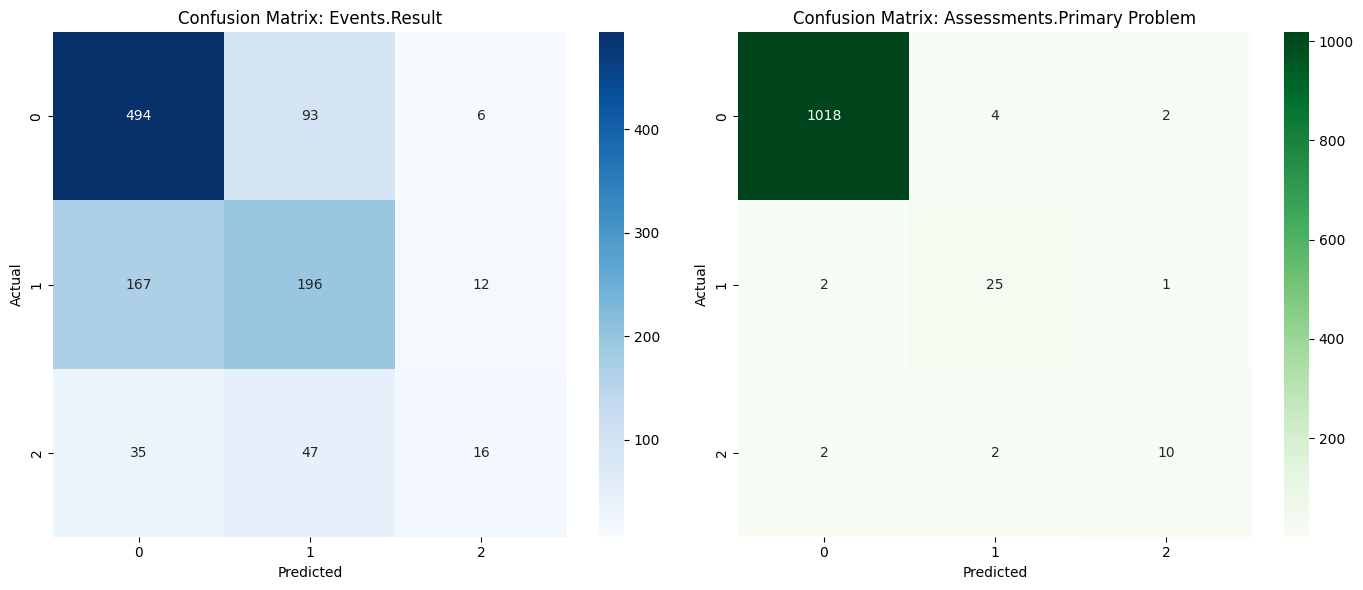

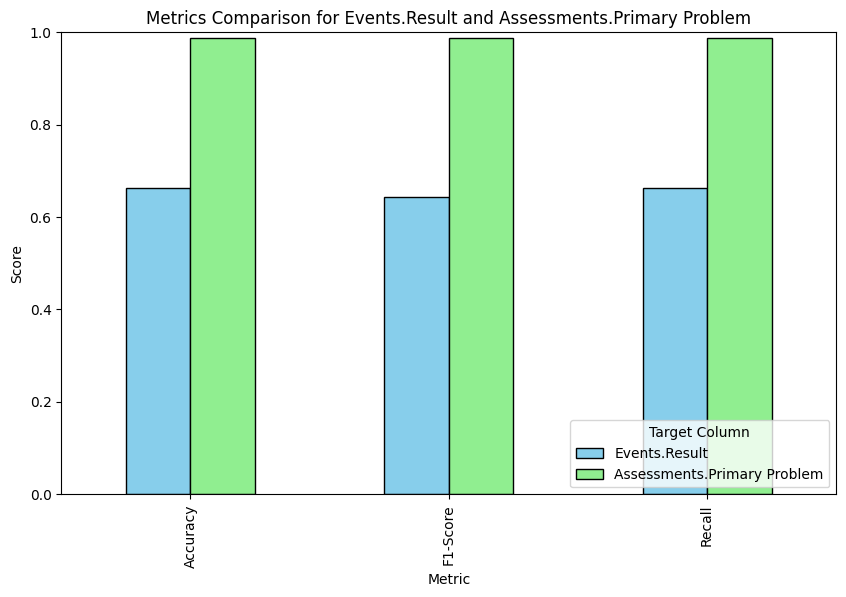

In [80]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.model_selection import train_test_split

df = df[df['Events.Result'].isin([1, 2, 3])]
df = df[df['Assessments.Primary Problem'].isin([1, 2, 3])]

y_result = df['Events.Result'].map({1: 0, 2: 1, 3: 2})
y_problem = df['Assessments.Primary Problem'].map({1: 0, 2: 1, 3: 2})
X = df.drop(columns=['Events.Result', 'Assessments.Primary Problem'])

X_train_result, X_test_result, y_train_result, y_test_result = train_test_split(
    X, y_result, test_size=0.2, random_state=42
)
X_train_problem, X_test_problem, y_train_problem, y_test_problem = train_test_split(
    X, y_problem, test_size=0.2, random_state=42
)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Evaluate for Events.Result
model.fit(X_train_result, y_train_result)
y_pred_result = model.predict(X_test_result)

accuracy_result = accuracy_score(y_test_result, y_pred_result)
f1_result = f1_score(y_test_result, y_pred_result, average='weighted')
recall_result = recall_score(y_test_result, y_pred_result, average='weighted')
conf_matrix_result = confusion_matrix(y_test_result, y_pred_result)

# Evaluate for Assessments.Primary Problem
model.fit(X_train_problem, y_train_problem)
y_pred_problem = model.predict(X_test_problem)

accuracy_problem = accuracy_score(y_test_problem, y_pred_problem)
f1_problem = f1_score(y_test_problem, y_pred_problem, average='weighted')
recall_problem = recall_score(y_test_problem, y_pred_problem, average='weighted')
conf_matrix_problem = confusion_matrix(y_test_problem, y_pred_problem)

# Print metrics
print("Metrics for Events.Result Model:")
print(f"Accuracy: {accuracy_result:.2f}, F1-Score: {f1_result:.2f}, Recall: {recall_result:.2f}")

print("\nMetrics for Assessments.Primary Problem Model:")
print(f"Accuracy: {accuracy_problem:.2f}, F1-Score: {f1_problem:.2f}, Recall: {recall_problem:.2f}")

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_result, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix: Events.Result")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_problem, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix: Assessments.Primary Problem")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Compare metrics using a bar chart
metrics = {
    "Metric": ["Accuracy", "F1-Score", "Recall"],
    "Events.Result": [accuracy_result, f1_result, recall_result],
    "Assessments.Primary Problem": [accuracy_problem, f1_problem, recall_problem],
}

metrics_df = pd.DataFrame(metrics)

metrics_df.plot(
    x="Metric",
    kind="bar",
    figsize=(10, 6),
    color=["skyblue", "lightgreen"],
    edgecolor="black",
)
plt.title("Metrics Comparison for Events.Result and Assessments.Primary Problem")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Target Column", loc="lower right")
plt.show()
